A continuación realizare una regresión lineal multiple para analizar datos de la NASA en los que determinaron perfiles aerodinámicos ideales ante distintas condiciones, como: la velocidad del
viento y ángulo de ataque del mismo.

Utilizare el Archivo A1.3 NASA.csv donde se encuentran 1,052 observaciones distintas, con 6 mediciones para cada una de ellas.

La base de datos cuenta con la siguiente información:



*   “frecuencia”. Frecuencia, en Hz.
* “angulo”. Ángulo de ataque, en grados.
* “longitud”. Longitud de cuerda geométrica, en metros.
* “velocidad”. Velocidad de flujo libre, en metros por segundo.
* “espesor”. Espesor del desplazamiento en el lado de succión, en metros.
* “presion”. Nivel escalado de presión sonora, en dB.


In [ ]:
# Primero iniciare importando los datos del archivo "A.3 NASA.csv"
import pandas as pd
datos = pd.read_csv("A1.3 NASA.csv")
print(datos.shape)
datos.head(15)

(1503, 6)


,frecuencia,angulo,longitud,velocidad,espesor,presion
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


A continuación separare el data frame en datos de entrenamiento y datos de prueba con una proporción de 70/30 (70%) ya que este porcentaje de datos se usara para entrenar el modelo y el resto para validar sus resultados.

In [ ]:
# Generamos una muestra aleatoria de elementos y especificamos el 70%
train = datos.sample(frac = 0.7)
test = (datos.drop(train.index)) # Se generan los datos de validación

# Imprimimos ambas
print(train.shape)
print(test.shape)

# Ahora comprobamos que la cantidad de observaciones de ambos conjuntos suman
# la cantidad de datos original
print("El numero de datos original es de: ",datos.shape)
print("La suma de las observaciones de ambos conjuntos es de: ",train.shape[0] + test.shape[0])



(1052, 6)
(451, 6)
El numero de datos original es de:  (1503, 6)
La suma de las observaciones de ambos conjuntos es de:  1503


Ahora procederé a entrenar el modelo de regresión lineal múltiple, utilizando las primeras cinco variables del conjunto de datos (frecuencia, ángulo, longitud, velocidad y espesor) como predictores de la variable objetivo "presión".

In [ ]:
# Importamos la librería
import statsmodels.api as sm

X = train.drop('presion',axis = 1) # Variables predictoras
Y = train.presion # Variable objetivo

# Definimos el modelo de regresión multiple
modelo = sm.OLS(Y,sm.add_constant(X))
resultados = modelo.fit() # ajustamos el modelo para obtener los resultados

# Imprimimos el resumen de los resultados
print(resultados.summary())

# Extraemos los p-values
print("Los p-values de los coeficientes son: ")
print(resultados.pvalues)

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     220.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):          7.33e-161
Time:                        23:56:53   Log-Likelihood:                -3151.3
No. Observations:                1052   AIC:                             6315.
Df Residuals:                    1046   BIC:                             6344.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        133.0530      0.659    201.946      0.0

Con base a los resultados obtenidos, se puede concluir que todas las variables son estadísticamentes significativas en la predicción de la presión, ya que sus p-values son menores a 0.05.

Las variables con mayor impacto en la presión son "espesor" y "longitud", debido a sus coeficientes altos en valor absoluto.

En particular la variable más importante del modelo es "espesor", con un coeficiente de -142.9691, lo que indica que cambios en el espesor afectan significativamente la presión.

El R²  ajustado del modelo es de 0.515, lo que significa que el modelo explica aproximadamente el 51.5% de la variabilidad de la presión. Aunque no es un ajuste perfecto, sí captura una parte considerable de la relación entre las variables.

Para medir el rendimiento del modelo de regresión lineal múltiple, calcularemos dos métricas clave:

Residual Standard Error (RSE): Mide el promedio del error en la predicción de la presión. Un valor más bajo indica un mejor ajuste del modelo.
Coeficiente de determinación (R²): Representa qué porcentaje de la variabilidad en la presión  es explicada por el modelo. Un valor más cercano a 1 indica un mejor desempeño.
Calcularemos estos indicadores tanto en el conjunto de entrenamiento como en el conjunto de prueba, lo que nos permitirá analizar si el modelo tiene un buen ajuste a los datos o si presenta problemas como sobreajuste o bajo ajuste.

In [ ]:
import numpy as np

# Para conjunto de entrenamiento
Xtrain = train.drop('presion', axis = 1)
Ytrain = train['presion']

yhatTrain = resultados.predict(sm.add_constant(Xtrain))

RSStrain = sum((Ytrain - yhatTrain)**2)
TSStrain = sum((Ytrain - np.mean(Ytrain))**2)

ntrain = Xtrain.shape[0] # Observaciones
mtrain = Xtrain.shape[1] # variables predictoras

RSEtrain = np.sqrt(RSStrain/(ntrain - mtrain - 1))
R2train = 1 - (RSStrain/TSStrain)

# Imprimimos los resultados de entrenamiento
print("\nLos resultados de entrenamiento son: ")
print("El RSE de entrenamiento es de:  ",RSEtrain)
print("El R² de entraiento es de: ",R2train)

# Para conjunto de prueba

Xtest = test.drop('presion', axis = 1)
Ytest = test['presion']

yhatTest = resultados.predict(sm.add_constant(Xtest))

RSStest = sum((Ytest - yhatTest)**2)
TSStest = sum((Ytest - np.mean(Ytest))**2)

ntest = Xtest.shape[0] # Observaciones
mtest = Xtest.shape[1] # variables predictoras

RSEtest = np.sqrt(RSStest/(ntest - mtest - 1))
R2test = 1 - (RSStest/TSStest)

# Imprimimos los resultados de prueba

print("\nLos resultados de prueba son: ")
print("El RSE de prueba es de:  ",RSEtest)
print("El R² de prueba es de: ",R2test)


Los resultados de entrenamiento son: 
El RSE de entrenamiento es de:   4.852185569942021
El R² de entraiento es de:  0.5135037410929573

Los resultados de prueba son: 
El RSE de prueba es de:   4.746793664881512
El R² de prueba es de:  0.5193515309322219


Para complementar el análisis del modelo de regresión lineal múltiple, generaremos una gráfica de dispersión que compare los valores reales de la presión sonora con los valores predichos por el modelo en el conjunto de prueba.

Esta visualización nos permitirá observar cómo se distribuyen las predicciones en relación con los valores observados y evaluar si el modelo sigue una tendencia clara o presenta alta variabilidad en sus estimaciones.

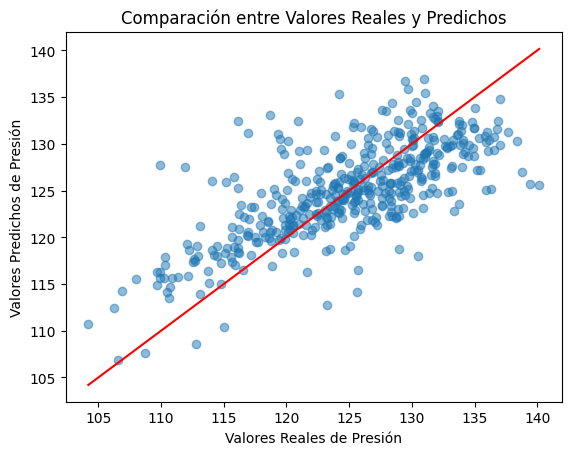

In [ ]:
# Importamos la librería

import matplotlib.pyplot as plt

# Creamos la gráfica
plt.scatter(x=Ytest, y=yhatTest, alpha=0.5)

plt.xlabel("Valores Reales de Presión")
plt.ylabel("Valores Predichos de Presión")
plt.title("Comparación entre Valores Reales y Predichos")

plt.plot([min(Ytest), max(Ytest)], [min(Ytest), max(Ytest)], color="red", linestyle="-") # Línea de referencia y=x

# Mostrar la gráfica
plt.show()

Con base en la gráfica obtenida, se puede concluir que el modelo de regresión lineal múltiple es capaz de predecir la presión sonora con un nivel aceptable de precisión. No obstante, la dispersión observada indica que algunas predicciones se alejan de los valores reales, lo que sugiere que podrían explorarse métodos más avanzados o realizar ajustes adicionales para mejorar la precisión del modelo.